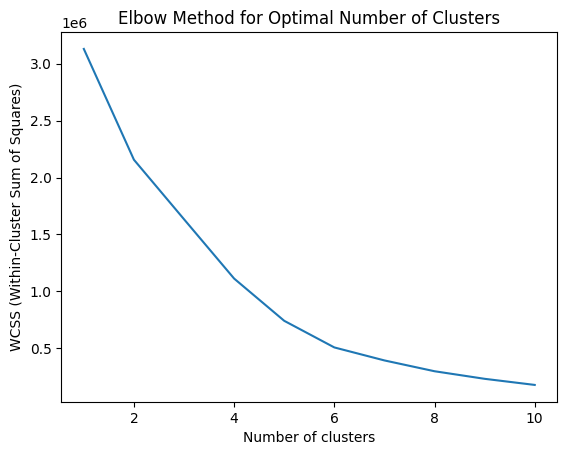

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Load the datasets
df_modif_reviews = pd.read_csv('modif_reviews.csv')
df_recipes_filtered = pd.read_csv('recipes_filtered_cleaned.csv')
fruits_df = pd.read_csv('fruits_data.csv')
vegetables_df = pd.read_csv('vegetables_data.csv')

# Merge fruits and vegetables into one dataframe
seasonal_produce_df = pd.concat([fruits_df, vegetables_df])
seasonal_produce_df.columns = ['product_name', 'month', 'country']

# Convert month names to numeric values using a mapping dictionary
month_mapping = {
    'january': 1, 'february': 2, 'march': 3, 'april': 4,
    'may': 5, 'june': 6, 'july': 7, 'august': 8,
    'september': 9, 'october': 10, 'november': 11, 'december': 12
}
seasonal_produce_df['month'] = seasonal_produce_df['month'].str.lower().map(month_mapping)

# Create a set of seasonal produce names for faster lookup
seasonal_produce_set = set(seasonal_produce_df['product_name'])

# Define a function to count seasonal ingredients in a recipe
def count_seasonal_ingredients(ingredients):
    return sum(1 for ingredient in ingredients.split(',') if ingredient.strip() in seasonal_produce_set)

# Create the 'num_seasonal_ingredients' column
df_recipes_filtered['num_seasonal_ingredients'] = df_recipes_filtered['recipeingredientparts'].apply(count_seasonal_ingredients)

# Select features for clustering
features = ['aggregatedrating', 'reviewcount', 'cooktime', 'preptime', 'totaltime', 'num_seasonal_ingredients']
X = df_recipes_filtered[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Apply KMeans clustering with the optimal number of clusters (3)
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_recipes_filtered['cluster'] = kmeans.fit_predict(X_scaled)

# Analyze the clusters
cluster_summary = df_recipes_filtered.groupby('cluster').mean()


print(cluster_summary)
